# Part II - Factors that Determine possibility to Payment of Loans
## by Zaburi Frolian Mwachusi

## Investigation Overview


In this investigation, I wanted to look at the features that can predict the possibility of the loan to be repaid. The main focus was with Employment Status, Debt To Income Ratio, Property ownership, Income Range, Employment Status Duration,Stated Monthly Income, Borrower State, Available Bankcard Credit, Recommendations, Investors, and Occupation 


## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
#load the dataset
df = pd.read_csv("C:/Users/( ^_^ )/OneDrive/Desktop/Udacity projects/Udacity project 3/prosperLoanData.csv")


In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(10)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
#Columns
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [7]:
#Values of loan status
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

## Distribution of Loan Status

Loan status has long tail distribution with most of loans being Current. LoanStatus is clearly unimodal with one peak at 'Current' status.  56576 loans are in current status followed by 38074 with completed loans 


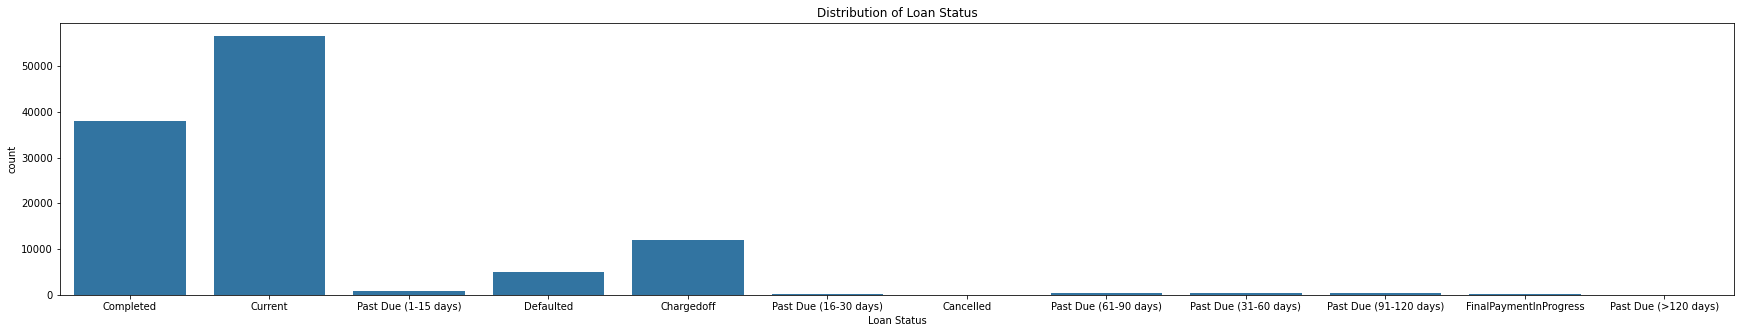

In [8]:
plt.figure(figsize=[30, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'LoanStatus', color = default_color)
plt.xlabel('Loan Status')
plt.title('Distribution of Loan Status')
plt.show()

## Distribution of Stated Monthly income

The distribution of stated monthly salary is Unimodal with peak between USD2,000 and USD10,000 also slightly left skewed

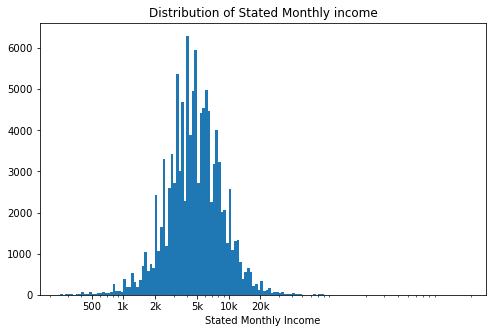

In [9]:
#plot for distribution of Stated Monthly Income
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Stated Monthly Income')
plt.title('Distribution of Stated Monthly income')
plt.show()

## Stated Monthly Income Vs Loan Status

There is high correlation between stated monthly income with the loan status especially the completed and current loans As the stated monthly income increase also the correlation increase thus showing for people with high stated monthly income has high number of completed loans together with current loans


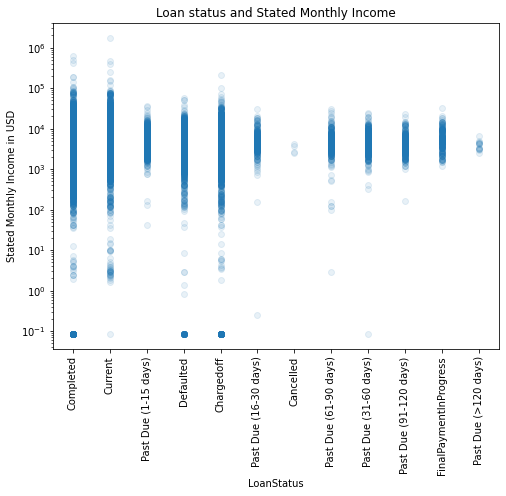

In [10]:
#Scatter plot of loan status and Stated Monthly Income
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'LoanStatus', y = 'StatedMonthlyIncome', alpha = 1/10)
plt.yscale('log')
plt.ylabel('Stated Monthly Income in USD')
plt.xticks(rotation=90)
plt.xlabel('LoanStatus')
plt.title('Loan status and Stated Monthly Income')
plt.show()

## Distribution of Available Bankcard Credit

The distribution have flat top ranging from USD2,000 to USD20,000 and slightly right skewed. There is high accumulation of loans where by individuals have bank card credits USD2,000-20,000

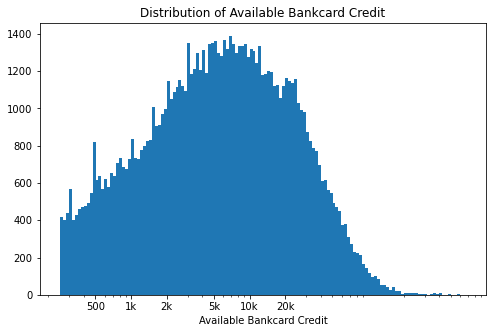

In [11]:
#plot for distribution of Available Bankcard Credit 

log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['AvailableBankcardCredit'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Available Bankcard Credit')
plt.title('Distribution of Available Bankcard Credit')
plt.show()

## Available Bankcard Credit Vs Loan Status

There is high correlation between Available Bankcard Credit with the loan status especially the completed and current loans As the Available Bankcard Credit  increase also the correlation increase thus showing for people with high Available Bankcard Credit  has high number of completed loans together with current loans


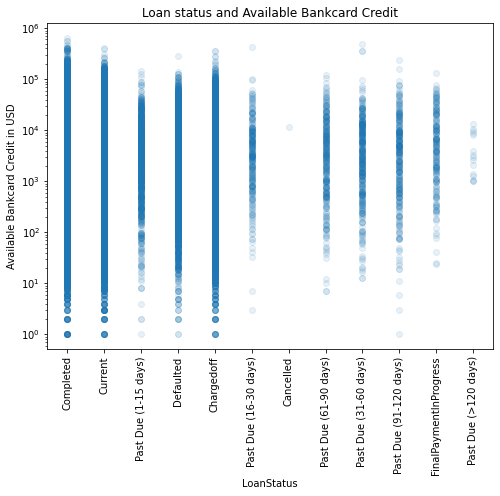

In [12]:
#Scatter plot of loan status and Available Bankcard Credit 
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'LoanStatus', y = 'AvailableBankcardCredit', alpha = 1/10)
plt.yscale('log')
plt.ylabel('Available Bankcard Credit in USD')
plt.xticks(rotation=90)
plt.xlabel('LoanStatus')
plt.title('Loan status and Available Bankcard Credit')
plt.show()

## Loan Status and other numeric variables

There is some negative relationships for the features like debt to income ratio and Recommendations. When the value of these features increases the number of completed loans and current loans tend to decrease these features are worthwhile exploring before reaching the final conclusion for the financial institution

<Figure size 720x720 with 0 Axes>

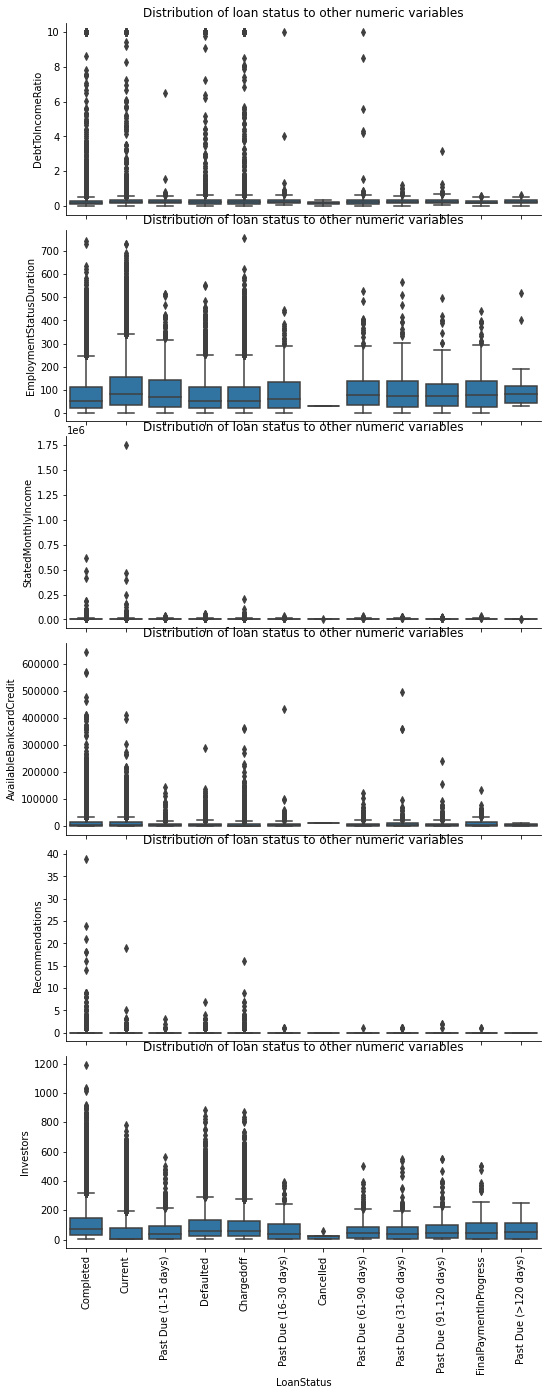

In [13]:
numeric_var = ['DebtToIncomeRatio', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'AvailableBankcardCredit', 'Recommendations', 'Investors']
categorical_var = ['LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'BorrowerState', 'Occupation']
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    plt.title('Distribution of loan status to other numeric variables')
    sb.boxplot(x, y, color = default_color)
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = numeric_var, x_vars = ['LoanStatus'],size = 3, aspect = 2.5)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.show();

## Loan Status with Categorical Variables

For employment status employed and full-time showed high trend for completed and current loans the trend decrease as you approach not employed and loans from retired individuals. Guess what? For the property Ownership  Trend went so different from our perspective loans that are not home owners had a lot of completed loans. But for the current loans home owners beat the number. We expected property ownership to be one of the key features for loans completion as most of financial institutions use houses and other properties as collaterals to offer access to loans. But data shows people with no houses are the one who completed there loans at high number compared to those with property ownership 

This suppose to be taken to much of consideration. Financial institutions must modify there rules and procedures to make sure those with considerable cashflow are prioritized

For the state of borrowers trend suggests completed and current loans are mostly from Colorado, Minnesota and trend decrease as you approach North Dakota. Also California and Newyork also have considerable amount of loans that are completed

Income range is vital key to predict cashflow, For most loans that are completed or current income range of USD25,000-49,999 and USD50,000 - 74,999 has the most number of loans the trend decrease as you approach to unemployed. 

Occupation also show the trend with high number of completed and current loans are from professionals,  skilled labor and executives. The trend decrease as you approach to student-College Freshman.  

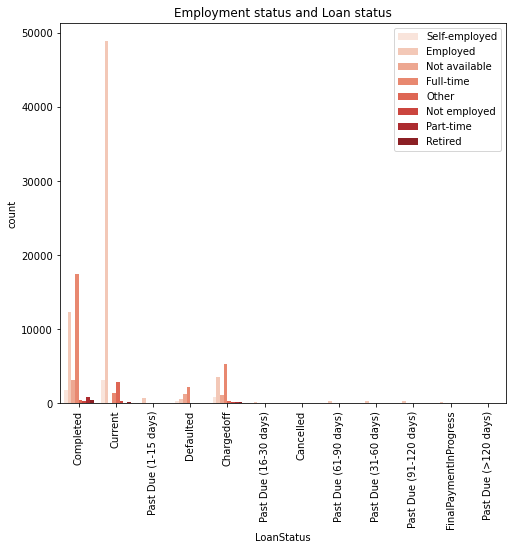

In [14]:
#loan status vs employment status
plt.figure(figsize = [8, 7])

sb.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Reds')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('Employment status and Loan status')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

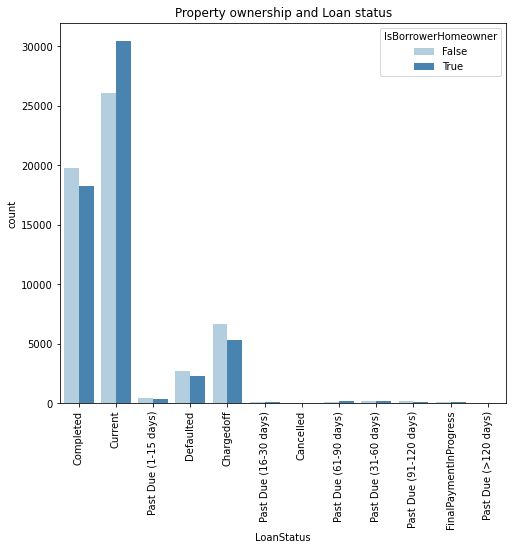

In [15]:
#loan status vs property ownership
plt.figure(figsize = [8, 7])
sb.countplot(data = df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.xticks(rotation=90)
plt.title('Property ownership and Loan status')
plt.show

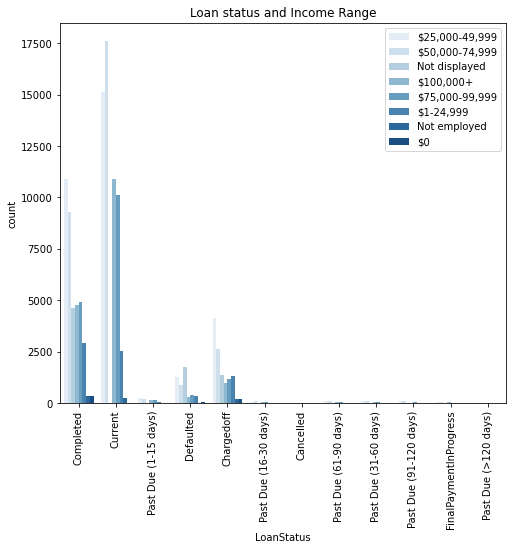

In [16]:
#loan status and Income Range
plt.figure(figsize = [8, 7])
sb.countplot(data = df, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Loan status and Income Range')
plt.show()

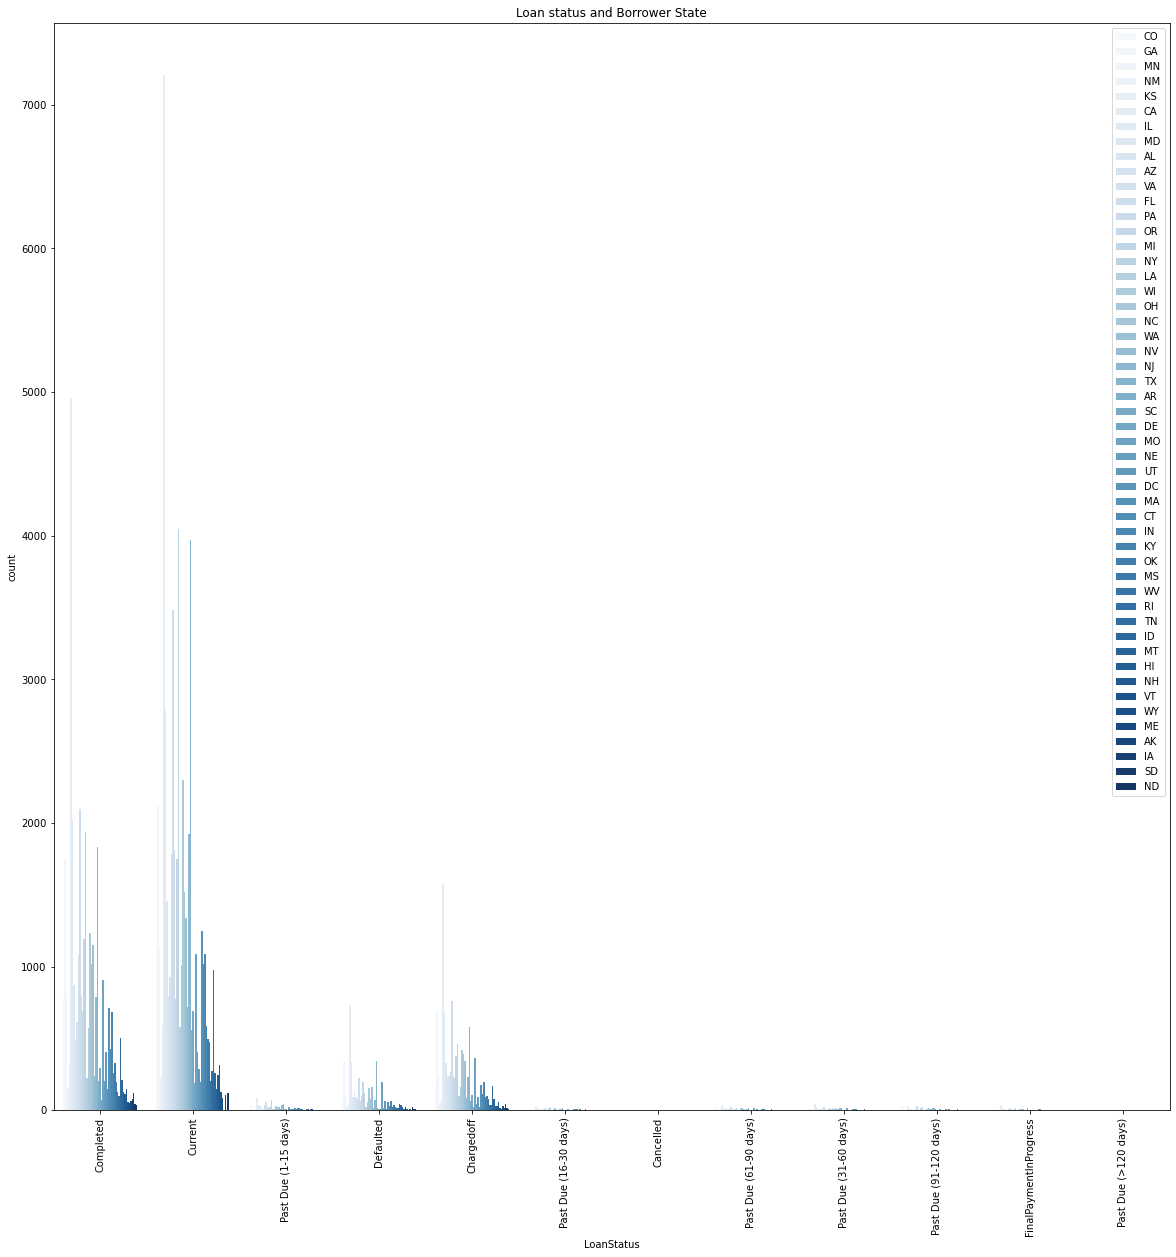

In [17]:
#loan status and Borrower State
plt.figure(figsize = [20, 20])
sb.countplot(data = df, x = 'LoanStatus', hue = 'BorrowerState', palette = 'Blues')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Loan status and Borrower State')
plt.show()


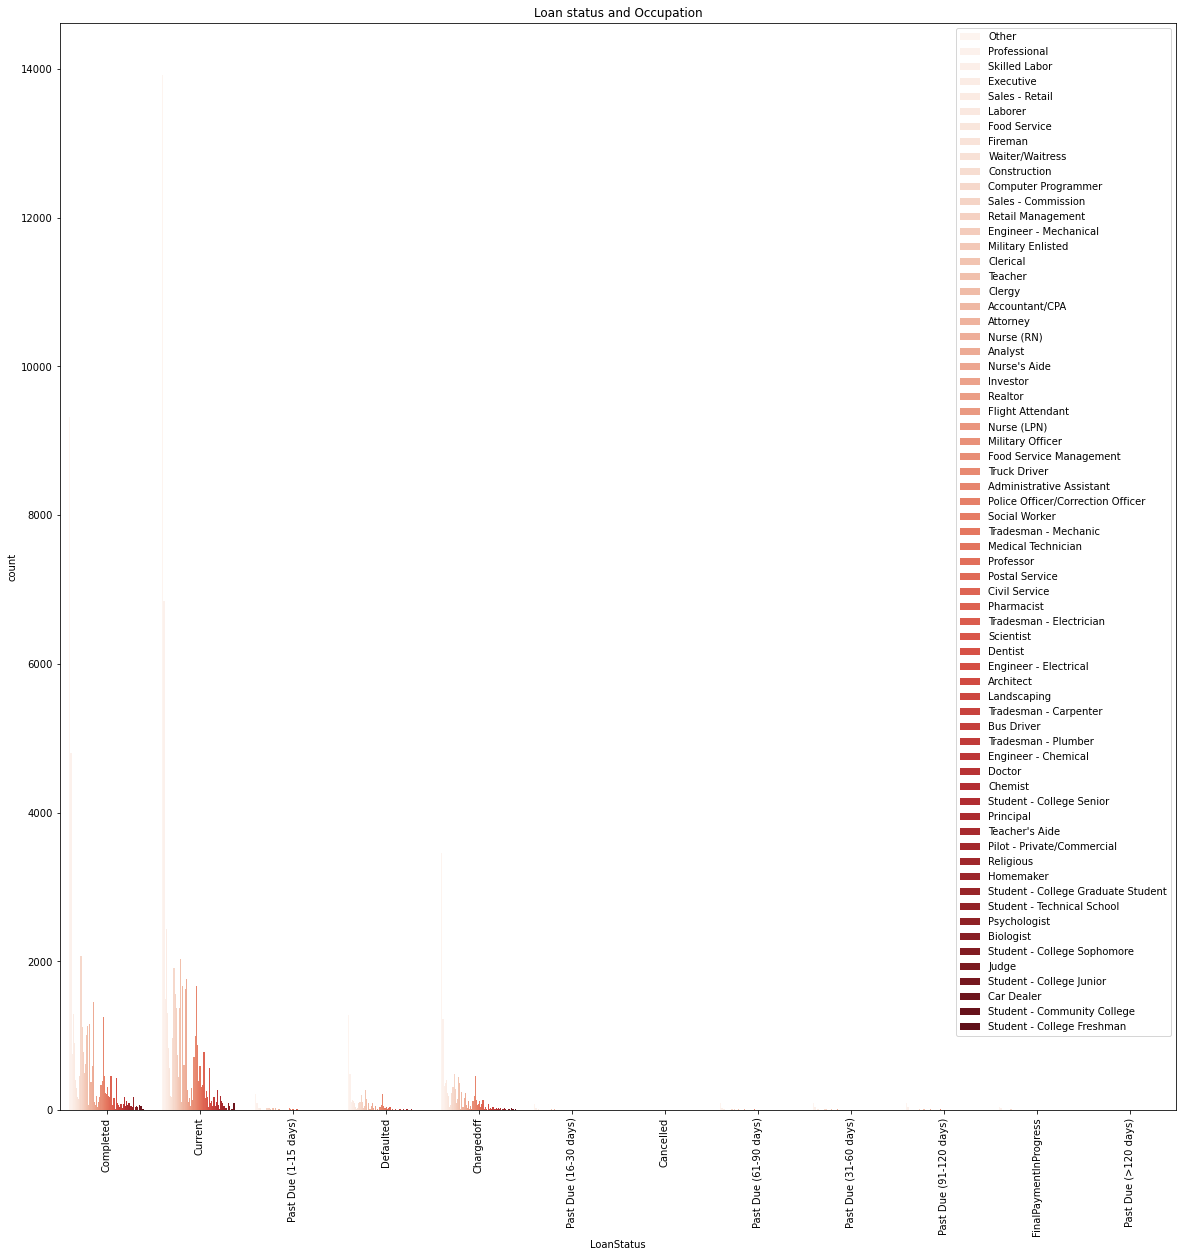

In [18]:
#loan status and occupation
plt.figure(figsize = [20, 20])
sb.countplot(data = df, x = 'LoanStatus', hue = 'Occupation', palette = 'Reds')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Loan status and Occupation')
plt.show()

In [26]:
!jupyter nbconvert Part_II_slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slides.ipynb to slides
[NbConvertApp] Writing 1144995 bytes to Part_II_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Program Files (x86)\Mr DJ\New folder (2)\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Program Files (x86)\Mr DJ\New folder (2)\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Program Files (x86)\Mr DJ\New folder (2)\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Program Files (x86)\Mr DJ\New folder (2)\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Program Files (x86)\Mr DJ\New folder (2)\lib\site-packages\nbconvert\nbconvertapp.py", lin